In [10]:
library(tidyverse)
library(infer)

# Vancouver Crime Data

## Introduction

## Preliminary Results

We'll start by importing the dataset from it's original source, loading it into a dataframe and inspecting the results.

In [7]:
download.file("http://geodash.vpd.ca/opendata/crimedata_download/crimedata_csv_all_years.zip", destfile="crime_data.zip")
unzip("crime_data.zip")
crime_data <- read_csv("crimedata_csv_all_years.csv")

In [13]:
head(crime_data)

TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
Break and Enter Commercial,2012,12,14,8,52,NA,Oakridge,491285.0,5453433
Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490613.0,5457110
Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491007.8,5459174
Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9,5459166
Break and Enter Commercial,2020,7,28,19,12,10XX ALBERNI ST,West End,491015.9,5459166
Break and Enter Commercial,2005,11,14,3,9,10XX ALBERNI ST,West End,491021.4,5459161


We're primarily interested in the year, type and neighbourhood of crimes, so we'll extract those columns and discard the rest. In addition, we would like to focus on year 2017-2020.

In [21]:
crime_data <- crime_data %>% 
    select(TYPE, YEAR, NEIGHBOURHOOD) %>%
    filter(2017 <= YEAR & YEAR <= 2020)
head(crime_data)

TYPE,YEAR,NEIGHBOURHOOD
<chr>,<dbl>,<chr>
Break and Enter Commercial,2019,Fairview
Break and Enter Commercial,2019,West End
Break and Enter Commercial,2020,West End
Break and Enter Commercial,2017,West End
Break and Enter Commercial,2018,West End
Break and Enter Commercial,2020,West End


Next, let's see how many different types of crimes there are.

In [19]:
unique(crime_data$TYPE)

[1] "Break and Enter Commercial"                            
 [2] "Break and Enter Residential/Other"                     
 [3] "Homicide"                                              
 [4] "Mischief"                                              
 [5] "Offence Against a Person"                              
 [6] "Other Theft"                                           
 [7] "Theft from Vehicle"                                    
 [8] "Theft of Bicycle"                                      
 [9] "Theft of Vehicle"                                      
[10] "Vehicle Collision or Pedestrian Struck (with Fatality)"
[11] "Vehicle Collision or Pedestrian Struck (with Injury)"

We're hoping to compare crime rates across years in neighbourhoods that represent a reasonable distribution of incomes. For our proposal, we're going to be using the Shaughnessy, Strathcona, and Marpole neighbourhoods.

In [22]:
crime_data <- crime_data %>%
    filter(NEIGHBOURHOOD %in% c("Shaughnessy", "Strathcona", "Marpole"))
head(crime_data)

TYPE,YEAR,NEIGHBOURHOOD
<chr>,<dbl>,<chr>
Break and Enter Commercial,2017,Strathcona
Break and Enter Commercial,2020,Strathcona
Break and Enter Commercial,2020,Strathcona
Break and Enter Commercial,2017,Strathcona
Break and Enter Commercial,2018,Strathcona
Break and Enter Commercial,2019,Strathcona


In [27]:
neighbourhood_year_counts <- crime_data %>% group_by(NEIGHBOURHOOD, YEAR) %>% summarise(number_of_crimes = n())

`summarise()` has grouped output by 'NEIGHBOURHOOD'. You can override using the `.groups` argument.



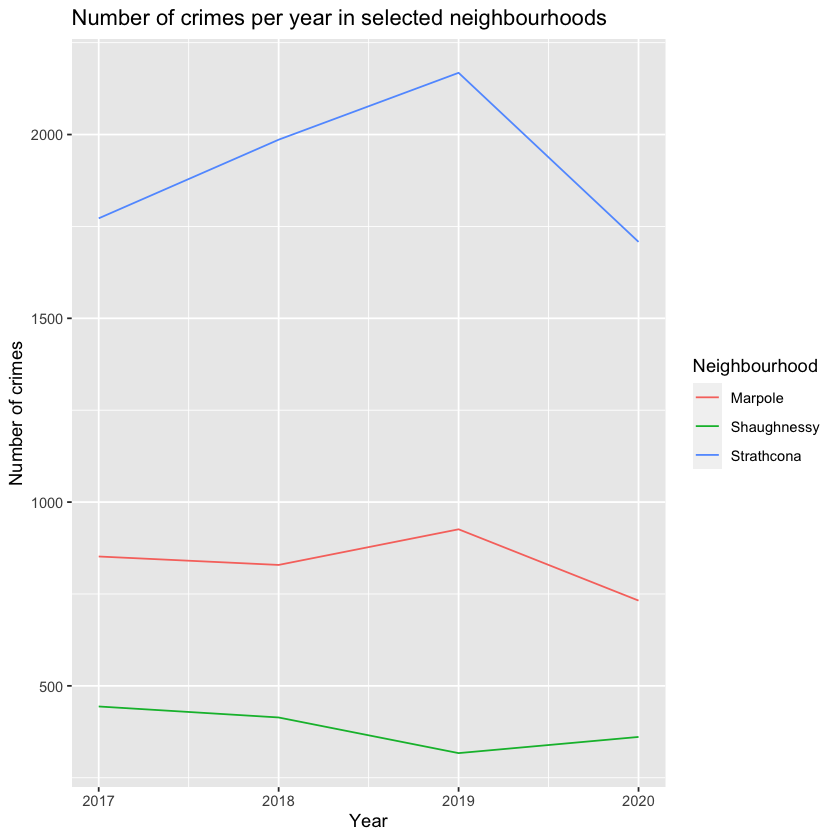

In [29]:
crime_data_plot <- neighbourhood_year_counts %>%
    ggplot() +
    geom_line(aes(x=YEAR, y=number_of_crimes, color=NEIGHBOURHOOD)) +
    xlab("Year") +
    ylab("Number of crimes") +
    labs(color="Neighbourhood") +
    ggtitle("Number of crimes per year in selected neighbourhoods")

crime_data_plot

## Methods